<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-GouldDirt26/blob/main/GEOL_593_Alex_M_Gould_Module_3_HW_FEB232026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:

import numpy as np
from scipy import stats

# STEP 1 - Define the parameters for the uniform distribution by bounds
Angle_lower = 20
Angle_upper = 35

# STEP 2 - Define the desired angle
Angle_desired = 25

# STEP 3 - Create distributions
  # Uniform
uniform_dist = stats.uniform(loc=Angle_lower, scale=Angle_upper - Angle_lower)
  # Analytical
probability_scipy = uniform_dist.cdf(Angle_desired)

# STEP 4 - Calculate the probability using the analytical approach
probability_analytical = (Angle_desired - Angle_lower) / (Angle_upper - Angle_lower)

# STEP 5 - Provide call back for analysis
print(f"Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than {Angle_desired}° is {probability_scipy:.4f} or {probability_scipy:.1%}")
print(f" ")
print(f"Utilizing an analytical approach [e.g., ({Angle_desired} - {Angle_lower}) / ({Angle_upper} - {Angle_lower})]. The proability the friction for the rock slope is less than {Angle_desired}° is {probability_analytical:.4f} or {probability_analytical:.1%}")
print(f" ")
# STEP6 - Verify Results
assert np.isclose(probability_scipy, probability_analytical), "Results Differ!"
print("Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .")

Utilizing a uniform distibution (Scripy). The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Utilizing an analytical approach [e.g., (25 - 20) / (35 - 20)]. The proability the friction for the rock slope is less than 25° is 0.3333 or 33.3%
 
Regardless of the method choosen, the probability the angle of friction lower than an analyzed angle is the same .


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
import numpy as np
from scipy import stats

# STEP 1 - Provide strength coefficients for location 1 and location 2
Strength_1 = input("Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")
Strength_2 = input("Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): ")

# Replace semicolons with spaces to standardize the separator
Strength_1_processed = Strength_1.replace(';', ' ')
Strength_2_processed = Strength_2.replace(';', ' ')
print(" ")
print("Data set 1 has strength coefficients of:", Strength_1_processed)
print("Data set 2 has strength coefficients of:", Strength_2_processed)

# Convert processed strength coefficients to NumPy arrays
Strength_1_array = np.array([float(x) for x in Strength_1_processed.split() if x.strip()])
Strength_2_array = np.array([float(x) for x in Strength_2_processed.split() if x.strip()])

# STEP 3 - Perform a two-sample independent t-test
t_statistic, p_value = stats.ttest_ind(Strength_1_array, Strength_2_array, equal_var=False)

print(f"\n--- T-Test of Strength Coefficients ---")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# STEP 4 - Select signifigance level
Significance_level_str = input("What significance level would you like to use?: ")

try:
    Significance_level = float(Significance_level_str)
    if p_value < Significance_level:
        print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({Significance_level}), and therefore our hypothesis is null.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from different populations.")
    else:
        print(f"Since the p-value ({p_value:.4f}) is greater than the significance level ({Significance_level}), and therefore we are unable to reject our hypothesis.")
        print(f"Based on our statistical analysis it is likely the two provided data sets are from the same populations.")
except ValueError:
    print(f"Invalid input for significance level: '{Significance_level_str}'. Please enter a valid number.")


Enter the collected strength coefficients of AREA 1, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2; 4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
Enter the collected strength coefficients of AREA 2, NOTE:separate values by a space or semicolon (i.e., 1.2; 2.3; 3.4; 4.5): 3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
 
Data set 1 has strength coefficients of: 4.4  4.2  4.5  4.0  4.3  4.1  3.9  4.2  4.5  3.8  4.0  4.3  4.2  4.2  4.1  4.5  4.2  4.3  4.1  3.7  4.0  4.5  4.6  4.3  4.1
Data set 2 has strength coefficients of: 3.7  4.5  4.2  4.4  4.3  4.0  3.5  3.9  4.3  4.3

--- T-Test of Strength Coefficients ---
T-statistic: 0.8004
P-value: 0.4382
What significance level would you like to use?: 0.05
Since the p-value (0.4382) is greater than the significance level (0.05), and therefore we are unable to reject our hypothesis.
Based on our statistical analysis it is likely the two provi

# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m.
Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected, the contractor
is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.

In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats

# STEP 1 - Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
Excavation_vol = input("Enter the total volume of excavation in cubic meters (m^3): ")
Boulder_percent = input("Enter the percentage of boulders in the excavation volume (in decimal form): ")

Enter the total volume of excavation in cubic meters (m^3): 10000
Enter the percentage of boulders in the excavation volume (in decimal form): 0.01


In [ ]:
import numpy as np
from scipy import stats

# Convert inputs from strings to floats
excavation_volume = float(Excavation_vol)
boulder_percentage = float(Boulder_percent)

# --- Parameters for Binomial Distribution ---

# Average boulder diameter
boulder_diameter = 1.5 # meters
boulder_radius = boulder_diameter / 2

# Calculate the approximate volume of a single boulder (assuming spherical)
volume_of_single_boulder = (4/3) * np.pi * (boulder_radius**3)
print(f"Approximate volume of a single boulder: {volume_of_single_boulder:.2f} m^3")

# 'n' (number of trials) for the binomial model can be estimated as the total excavation volume
# divided by the volume of a single boulder. This represents the number of 'boulder-sized slots'.
n_trials = int(round(excavation_volume / volume_of_single_boulder))

# 'p' (probability of success) is the volumetric percentage of boulders
p_success = boulder_percentage

print(f"Total excavation volume: {excavation_volume} m^3")
print(f"Boulder percentage (by volume): {p_success:.2%}")
print(f"Estimated number of trials (n): {n_trials}")
print(f"Probability of a 'slot' containing a boulder (p): {p_success}")

# Expected number of boulders based on experience
expected_boulders = excavation_volume * p_success / volume_of_single_boulder
print(f"Expected number of boulders from experience: {expected_boulders:.2f}")


Approximate volume of a single boulder: 1.77 m^3
Total excavation volume: 10000.0 m^3
Boulder percentage (by volume): 1.00%
Estimated number of trials (n): 5659
Probability of a 'slot' containing a boulder (p): 0.01
Expected number of boulders from experience: 56.59


In [ ]:
import numpy as np
from scipy import stats
# Binomial Model
binomial_dist = stats.binom(n=n_trials, p=p_success)
prob_more_than_ten_binom = 1 - binomial_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_binom:.4f}")

# Poisson Approximation
lambda_poisson = expected_boulders
poisson_dist = stats.poisson(mu=lambda_poisson)
prob_more_than_ten_poisson = 1 - poisson_dist.cdf(10)
print(f"Probability of more than ten boulders: {prob_more_than_ten_poisson:.4f}")

print("Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.")

Probability of more than ten boulders: 1.0000
Probability of more than ten boulders: 1.0000
Based on our analysis it is very likely that more than 10 boulders will be encountered and the contractor should put special contingencys in place for the removal of boulders.


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [ ]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# STEP 1 - Input Data
Skew_array = input("Enter the skewness values separated by spaces: ")
Kurtosis_array = input("Enter the kurtosis values separated by spaces: ")

# Convert input strings to numerical NumPy arrays
observed_beta1_squared = np.array([float(x) for x in Skew_array.split()])
observed_beta2 = np.array([float(x) for x in Kurtosis_array.split()])

print(f"Converted Skewness (beta1^2) values: {observed_beta1_squared}")
print(f"Converted Kurtosis (beta2) values: {observed_beta2}")

Enter the skewness values separated by spaces: 1.82 1.00 2.72 0.52
Enter the kurtosis values separated by spaces: 4.85 3.35 5.71 2.95
Converted Skewness (beta1^2) values: [1.82 1.   2.72 0.52]
Converted Kurtosis (beta2) values: [4.85 3.35 5.71 2.95]


In [ ]:
beta1_squared_normal = 0
beta2_normal = 3

print(f"Theoretical squared skewness (β₁²) for Normal distribution: {beta1_squared_normal}")
print(f"Theoretical kurtosis (β₂) for Normal distribution: {beta2_normal}")

Theoretical squared skewness (β₁²) for Normal distribution: 0
Theoretical kurtosis (β₂) for Normal distribution: 3


In [ ]:
#STEP 3 - Lognormal Comparison
s_lognormal = np.linspace(0.1, 1, 1000)
beta1_squared_lognormal = []
beta2_lognormal = []

for s_val in s_lognormal:
    # Calculate raw moments using lognorm.stats
    # The third moment is skewness, the fourth is kurtosis
    mean, var, skew, kurt = stats.lognorm.stats(s=s_val, moments='mvsk')

    # Squared skewness
    beta1_squared_lognormal.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_lognormal.append(kurt + 3)

beta1_squared_lognormal = np.array(beta1_squared_lognormal)
beta2_lognormal = np.array(beta2_lognormal)

print(f"Calculated {len(beta1_squared_lognormal)} pairs of theoretical (β₁², β₂) for Lognormal distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Lognormal distribution.


In [ ]:
#STEP 4 - Gamma Comparison
a_gamma = np.linspace(0.1, 100, 1000) # Shape parameter for Gamma distribution
beta1_squared_gamma = []
beta2_gamma = []

for a_val in a_gamma:
    # Calculate raw moments using gamma.stats
    mean, var, skew, kurt = stats.gamma.stats(a=a_val, moments='mvsk')

    # Squared skewness
    beta1_squared_gamma.append(skew**2)

    # Pearson's kurtosis (beta2) is Fisher's kurtosis + 3
    beta2_gamma.append(kurt + 3)

beta1_squared_gamma = np.array(beta1_squared_gamma)
beta2_gamma = np.array(beta2_gamma)

print(f"Calculated {len(beta1_squared_gamma)} pairs of theoretical (β₁², β₂) for Gamma distribution.")

Calculated 1000 pairs of theoretical (β₁², β₂) for Gamma distribution.


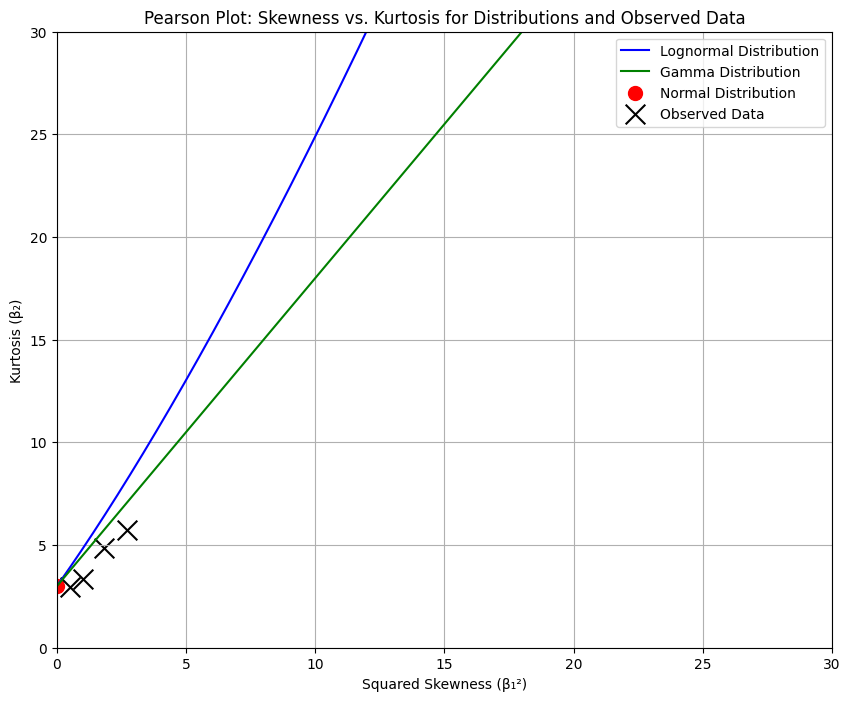

Based on the representation of the observed data in regards to a normal, lognormal, and gamma distribution, we conlude the lognormal distribution is most similar to the bedding plane distances.

Therefore, we would reccomend utilizing a lognormal distribution to predict further values with a horizontal translantion of 0.5 to the right.


In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 8))

# Plot theoretical distributions
plt.plot(beta1_squared_lognormal, beta2_lognormal, label='Lognormal Distribution', color='blue')
plt.plot(beta1_squared_gamma, beta2_gamma, label='Gamma Distribution', color='green')
plt.scatter(beta1_squared_normal, beta2_normal, color='red', marker='o', s=100, label='Normal Distribution')

# Plot observed data
plt.scatter(observed_beta1_squared, observed_beta2, color='black', marker='x', s=200, label='Observed Data')

# Add labels and title
plt.xlabel('Squared Skewness (β₁²)')
plt.ylabel('Kurtosis (β₂)')
plt.title('Pearson Plot: Skewness vs. Kurtosis for Distributions and Observed Data')
plt.legend()
plt.grid(True)
plt.xlim(-0.5, 6.0)
plt.ylim(2.0, 6.0)
plt.show()

print("Based on the representation of the observed data in regards to a normal distribution, we can  By observing where the black 'x' markers (observed data) fall relative to the colored lines and the red circle, \n")
print("we can infer which theoretical distribution the bedding plane distances most closely resemble.")

### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [ ]:
# STEP 1 - Import required Libraries
import numpy as np
import math

In [ ]:
# STEP 2 - Define Known Variables
Branch_1_area = 18
Branch_2_area = 10
Marine_fraction_Branch_1 = 0.35
Marine_fraction_Branch_2 = 0.80
Total_Area = Branch_1_area + Branch_2_area
print(f"Refer to the variables below\n")
print(f"Branch 1 has an area of {Branch_1_area} km² with a marine fossil fraction of {Marine_fraction_Branch_1}")
print(f"Branch 2 has an area of {Branch_2_area} km² with a marine fossil fraction of {Marine_fraction_Branch_2}")
print(f"The total area of both branches is {Total_Area} km²")

Refer to the variables below

Branch 1 has an area of 18 km² with a marine fossil fraction of 0.35
Branch 2 has an area of 10 km² with a marine fossil fraction of 0.8
The total area of both branches is 28 km²


In [ ]:
# STEP 3 - Calculate Prior Probabilities P(A1) and P(A2)
# Probability that a fossil came from Branch 1 based on its area
Branch_1_area_prob = Branch_1_area / Total_area

# Probability that a fossil came from Branch 2 based on its area
Branch_2_area_prob = Branch_2_area / Total_area

print(f"Prior Probability of fossil from Branch 1: {Branch_1_area_prob:.4f}")
print(f"Prior Probability of fossil from Branch 2: {Branch_2_area_prob:.4f}")

# STEP 4 - Calculate the Evidence P(B)
P_B = (P_B_given_A1 * P_A1) + (P_B_given_A2 * P_A2)

print(f"Evidence (Total Probability of Marine Fossil) (P_B): {P_B:.4f}")

# STEP 5 - Calculate the Posterior Probability P(A1|B) using Bayes' Theorem
# P(A1|B) = [P(B|A1) * P(A1)] / P(B)
P_A1_given_B = (P_B_given_A1 * P_A1) / P_B

print(f"\nUsing Bayes' Theorem:")
print(f"The probability that the fossil came from Branch 1, given it is a marine Cretaceous fossil, is: {P_A1_given_B:.4f} or {P_A1_given_B:.1%}")

Prior Probability of fossil from Branch 1: 0.6429
Prior Probability of fossil from Branch 2: 0.3571
Evidence (Total Probability of Marine Fossil) (P_B): 0.5107

Using Bayes' Theorem:
The probability that the fossil came from Branch 1, given it is a marine Cretaceous fossil, is: 0.4406 or 44.1%


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [ ]:
# STEP 1 - Import required Libraries
import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.
#
# Example steps:
# shape = sigma_lnphi
# scale = np.exp(mu_lnphi)
# Then lognorm.mean(shape, scale=scale) can give the mean of the distribution in original units.


In [ ]:
# STEP 2 - Define the given parameters for the log-transformed friction angle
mu_lnphi = 3.25
sigma_lnphi = 0.65
print(f"Given: Mean of log-transformed friction angle (μlnφ) = {mu_lnphi}")
print(f"Given: Std dev of log-transformed friction angle (σlnφ) = {sigma_lnphi}\n")

# STEP 3 - Calculate the parameters for scipy.stats.lognorm
# In scipy.stats.lognorm, the shape parameter 's' is sigma_lnphi
# The scale parameter 'scale' is exp(mu_lnphi)
shape = sigma_lnphi
scale = np.exp(mu_lnphi)

print(f"Lognormal distribution shape parameter: {shape:.2f}")
print(f"Lognormal distribution scale parameter: {scale:.2f}\n")

# Create the lognormal distribution object
lognormal_dist = lognorm(s=shape, scale=scale) # Correctly define lognormal_dist as the distribution object

# STEP 4 - Compute the mean friction angle in degrees
mean_friction_angle = lognormal_dist.mean() # Get the mean from the distribution object
print(f"Computed Mean Friction Angle: {mean_friction_angle:.2f} degrees\n")

Given: Mean of log-transformed friction angle (μlnφ) = 3.25
Given: Std dev of log-transformed friction angle (σlnφ) = 0.65

Lognormal distribution shape parameter: 0.65
Lognormal distribution scale parameter: 25.79

Computed Mean Friction Angle: 31.86 degrees



In [ ]:
# STEP 5 - Compute the confidence intervals for a given confidence
confidence_level_str = input("Enter the confidence level (e.g., 0.95): ")

try:
    confidence_level = float(confidence_level_str)
    # Now, lognormal_dist should be the distribution object after running cell ba72297e
    lower_bound, upper_bound = lognormal_dist.interval(confidence_level)

    print(f"Confidence Interval for Friction Angle (at {confidence_level*100:.0f}% confidence level):")
    print(f"Lower Bound: {lower_bound:.2f} degrees")
    print(f"Upper Bound: {upper_bound:.2f} degrees\n")
except ValueError:
    print(f"Invalid input for confidence level: '{confidence_level_str}'. Please enter a valid number.")

# Make these variables globally accessible for the next cell
# This ensures the discussion cell has the values even if run out of order
global confidence_level, mean_friction_angle, lower_bound, upper_bound, mu_lnphi, sigma_lnphi

Enter the confidence level (e.g., 0.95): 0.9
Confidence Interval for Friction Angle (at 90% confidence level):
Lower Bound: 8.85 degrees
Upper Bound: 75.13 degrees



In [ ]:
# STEP 6 - Answer
print(f"Given the porovided parameters μlnφ = {mu_lnphi} and σlnφ = {sigma_lnphi}.")
print("Assuming a lognormal distribution, which is typically right-skewed, reflecting that friction angles are positive values and can have a long tail towards higher values.")
print(f"The calculated mean friction angle is {mean_friction_angle:.2f} degrees, and with {confidence_level*100:.0f}% confidence, the true friction angle is expected to lie between {lower_bound:.2f} and {upper_bound:.2f} degrees.")
print(f"Based on the given range, these values seem correct through probability, however through experience the values are generally expected to fall between 20 to 37 degrees depending on its fines content and particle distribution.")

Given the porovided parameters μlnφ = 3.25 and σlnφ = 0.65.
Assuming a lognormal distribution, which is typically right-skewed, reflecting that friction angles are positive values and can have a long tail towards higher values.
The calculated mean friction angle is 31.86 degrees, and with 90% confidence, the true friction angle is expected to lie between 8.85 and 75.13 degrees.
Based on the given range, these values seem correct through probability, however through experience the values are generally expected to fall between 20 to 37 degrees depending on its fines content and particle distribution.


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


In [ ]:
# STEP 1 - Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Example structure:
# phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
# cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
# correlation_coefficient, p_value = pearsonr(phi, cohesion)


Friction Angles (φ): [25 22 32 29 28 38 36 32 27 23]
Cohesion (c): [50 65 18 20 30  5  6 12 38 45]




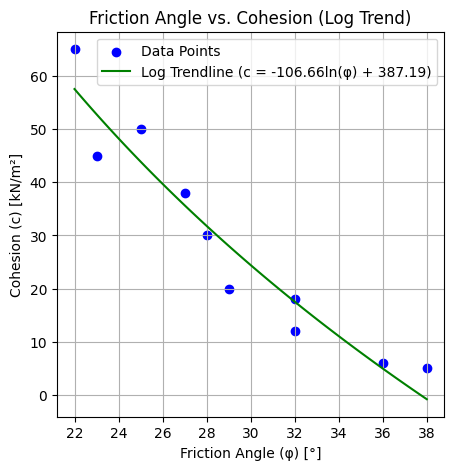

Pearson's Correlation Coefficient (linear): -0.9450
P-value: 0.0000


Based on linear correlation, there is a strong negative linear correlation between friction angle and cohesion (r = -0.95).
The linear correlation is statistically significant at the 5.0% level (p < 0.05).
The logarithmic trendline suggests a non-linear possibly a natural logirithmic relationship, where cohesion decreases as the friction angle increases. Based on my understanding of the cohesion / friction angle interactions, 
our probability and trend appears to be true and follows this general trend but will need to be further analyzed to determine the possible trend line.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# STEP 2 - Store the friction angle and cohesion data in numpy arrays
phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])

# Display the data
print("Friction Angles (φ):", phi)
print("Cohesion (c):", cohesion)
print("\n")

# STEP 2 - Plot φ vs. c to visualize potential correlation
plt.figure(figsize=(5, 5))
plt.scatter(phi, cohesion, color='blue', label='Data Points')

# Perform logarithmic regression (cohesion = a * log(phi) + b)
# Handle potential non-positive phi values by adding a small constant if necessary, though here all phi are positive.
log_phi = np.log(phi)

# Fit a linear model to log_phi and cohesion
a, b = np.polyfit(log_phi, cohesion, 1)

# Generate points for the log trendline
phi_for_trend = np.linspace(phi.min(), phi.max(), 100)
log_cohesion_trend = a * np.log(phi_for_trend) + b

plt.plot(phi_for_trend, log_cohesion_trend, color='green', label=f'Log Trendline (c = {a:.2f}ln(φ) + {b:.2f})')

plt.title('Friction Angle vs. Cohesion (Log Trend)')
plt.xlabel('Friction Angle (φ) [°]')
plt.ylabel('Cohesion (c) [kN/m²]')
plt.grid(True)
plt.legend()
plt.show()

# STEP 3 - Calculate Pearson's correlation coefficient
# (Note: Pearson's r directly measures linear correlation, so it's kept for the original data)
correlation_coefficient, p_value = pearsonr(phi, cohesion)
print(f"Pearson's Correlation Coefficient (linear): {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

#STEP 4 - Answer
if correlation_coefficient > 0.7:
    relationship = "a strong positive linear correlation"
elif correlation_coefficient > 0.3:
    relationship = "a moderate positive linear correlation"
elif correlation_coefficient < -0.7:
    relationship = "a strong negative linear correlation"
elif correlation_coefficient < -0.3:
    relationship = "a moderate negative linear correlation"
else:
    relationship = "a weak or no linear correlation"
print(f"\n")
print(f"Based on linear correlation, there is {relationship} between friction angle and cohesion (r = {correlation_coefficient:.2f}).")

alpha = 0.05 # Common significance level
if p_value < alpha:
    print(f"The linear correlation is statistically significant at the {alpha*100}% level (p < {alpha}).")
else:
    print(f"The linear correlation is not statistically significant at the {alpha*100}% level (p >= {alpha}).")

print("The logarithmic trendline suggests a non-linear possibly a natural logirithmic relationship, where cohesion decreases as the friction angle increases. Based on my understanding of the cohesion / friction angle interactions, \nour probability and trend appears to be true and follows this general trend but will need to be further analyzed to determine the possible trend line.")

### Question 4.8
Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence. Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.

In [ ]:
# STEP 1 - Import required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.


Monthly Landslide Frequencies (first 12 months):
2026-01-01     0
2026-02-01     4
2026-03-01    12
2026-04-01     5
2026-05-01     3
2026-06-01     1
2026-07-01     0
2026-08-01     3
2026-09-01     5
2026-10-01     2
2026-11-01     0
2026-12-01     0
Freq: MS, dtype: int64




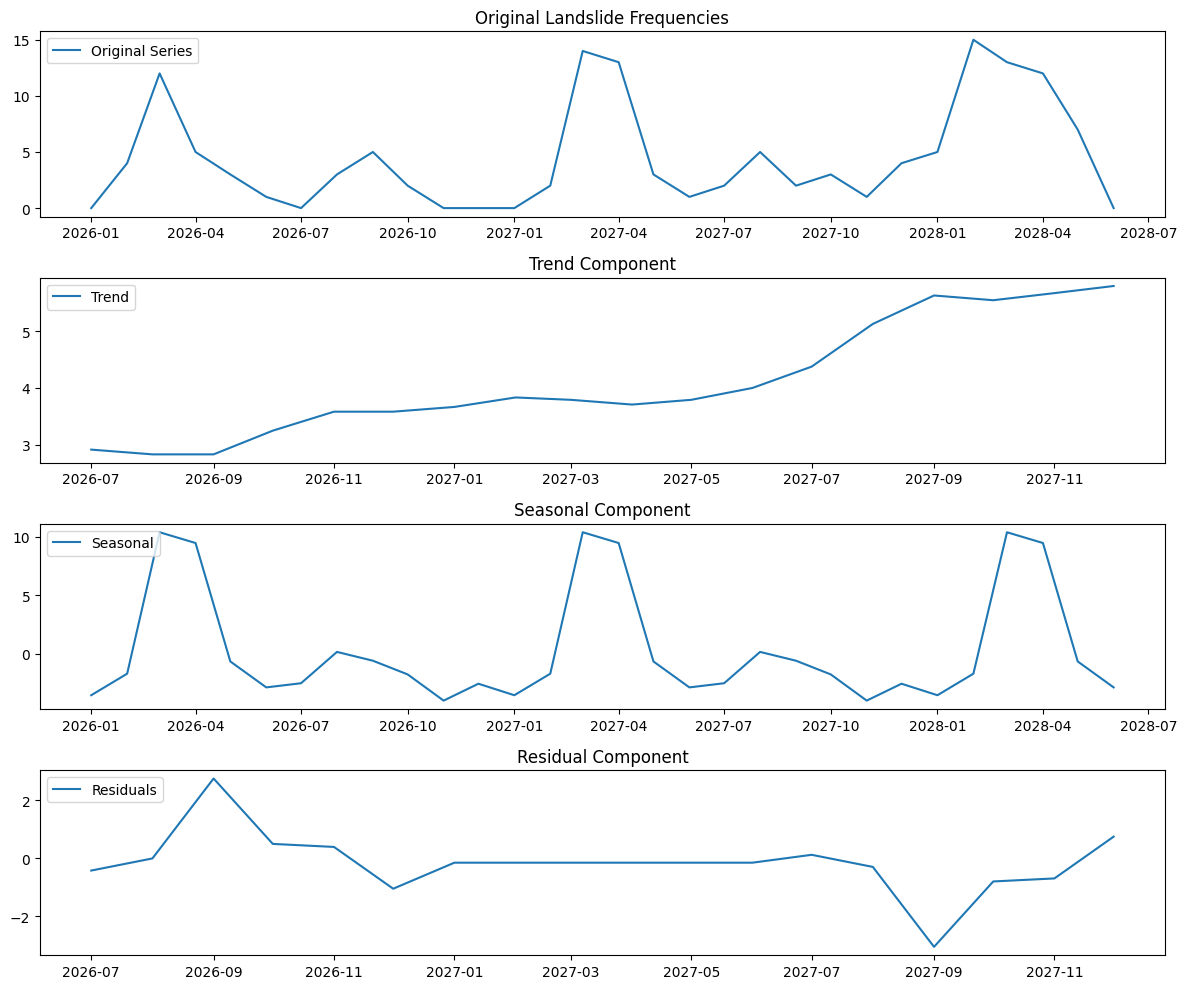

<Figure size 1000x500 with 0 Axes>

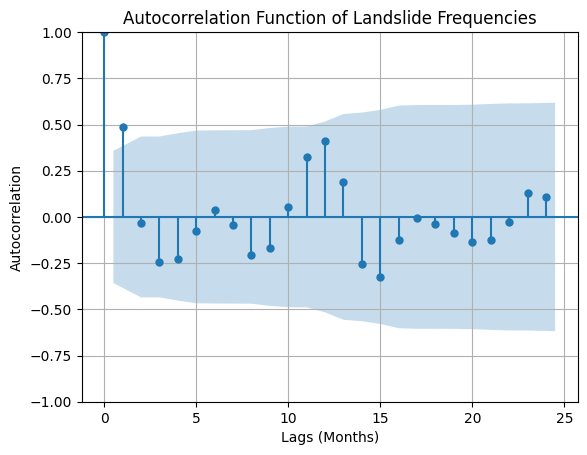


--- Analysis of Seasonality ---
The plots above show the decomposition of the landslide frequency time series into its trend, seasonal, and residual components. 

The 'Seasonal Component' plot illustrates repeating patterns, indicating the presence of seasonality (e.g., higher frequencies during certain months of the year). 

The 'Autocorrelation Function' plot further confirms this: significant spikes at lags corresponding to the seasonal period (e.g., 12, 24 months) indicate a cyclic pattern, suggesting that landslide occurrences are not random but exhibit significant seasonality. 

This analysis helps determine if there's a cyclic pattern or seasonal trend in landslide occurrence.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

# STEP 1 - Represent the monthly frequency data in a time series format.
# Monthly landslide frequency data provided by the user
landslide_frequencies_data = [0, 4, 12, 5, 3, 1, 0, 3, 5, 2, 0, 0, 0, 2, 14, 13, 3, 1, 2, 5, 2, 3, 1, 4, 5, 15, 13, 12, 7, 0] # Starting from January, then next year

# Assuming the data starts from January for the first year, and then continues sequentially
# The data length is 30, which corresponds to 30 months (2 years and 6 months)
dates = pd.date_range(start='2026-01-01', periods=len(landslide_frequencies_data), freq='MS')

# Create a pandas Series (time series)
landslide_ts = pd.Series(landslide_frequencies_data, index=dates)

print("Monthly Landslide Frequencies (first 12 months):")
print(landslide_ts.head(12))
print("\n")

# STEP 2 - Use time-series analysis (seasonal_decompose) to detect seasonality.
# We assume a 12-month period for seasonality (yearly cycle).
# 'additive' model is used when the magnitude of the seasonal fluctuations is constant over time.
# 'multiplicative' model is used when the magnitude of the seasonal fluctuations varies with the level of the series.
decomposition = seasonal_decompose(landslide_ts, model='additive', period=12)

# STEP 3 & 4 - Visualize the data to check for any repeating patterns and autocorrelation.
plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(landslide_ts, label='Original Series')
plt.title('Original Landslide Frequencies')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Autocorrelation plot to identify periodicity
plt.figure(figsize=(10, 5))
plot_acf(landslide_ts, lags=24, title='Autocorrelation Function of Landslide Frequencies')
plt.xlabel('Lags (Months)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

print("\n--- Analysis of Seasonality ---")
print("The plots above show the decomposition of the landslide frequency time series into its trend, seasonal, and residual components. \n")
print("The 'Seasonal Component' plot illustrates repeating patterns, indicating the presence of seasonality (e.g., higher frequencies during certain months of the year). \n")
print("The 'Autocorrelation Function' plot further confirms this: significant spikes at lags corresponding to the seasonal period (e.g., 12, 24 months) indicate a cyclic pattern, suggesting that landslide occurrences are not random but exhibit significant seasonality. \n")
print("This analysis helps determine if there's a cyclic pattern or seasonal trend in landslide occurrence.")


### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


In [5]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.


Please upload the first image file:


Saving Chlorite vs Depth B1.PNG to Chlorite vs Depth B1 (1).PNG
Displaying Chlorite vs Depth B1 (1).PNG:


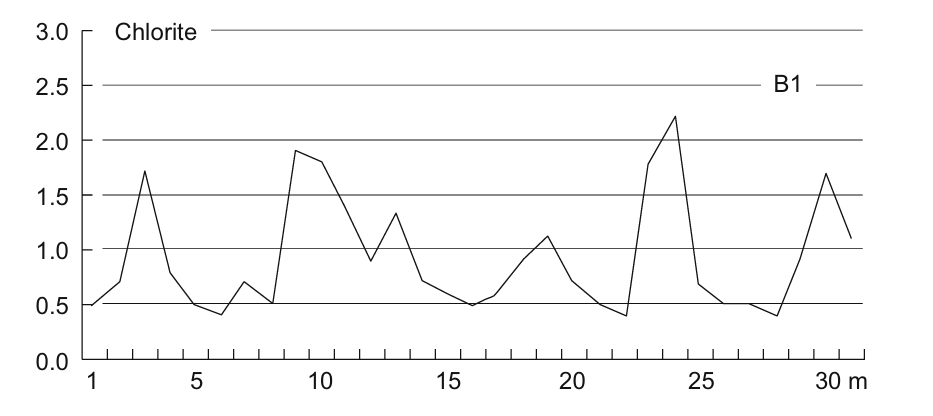


Please upload the second image file:


Saving Chlorite vs Depth B2.PNG to Chlorite vs Depth B2.PNG
Displaying Chlorite vs Depth B2.PNG:


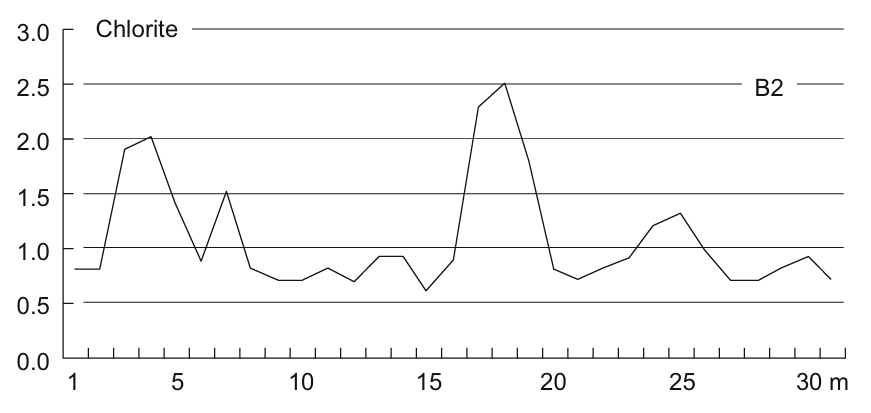


Two images uploaded and stored as 'global_img1' and 'global_img2'.


In [32]:
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# First figure input
print("Please upload the first image file:")
uploaded_img1 = files.upload()

img1 = None
filename1 = None
for fname, fbytes in uploaded_img1.items():
    filename1 = fname
    nparr = np.frombuffer(fbytes, np.uint8)
    img1 = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    if img1 is not None:
        print(f"Displaying {filename1}:")
        cv2_imshow(img1)
    else:
        print(f"Could not decode image {filename1}")
    break # Assuming only one file per upload prompt

# Second figure input
print("\nPlease upload the second image file:")
uploaded_img2 = files.upload()

img2 = None
filename2 = None
for fname, fbytes in uploaded_img2.items():
    filename2 = fname
    nparr = np.frombuffer(fbytes, np.uint8)
    img2 = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    if img2 is not None:
        print(f"Displaying {filename2}:")
        cv2_imshow(img2)
    else:
        print(f"Could not decode image {filename2}")
    break # Assuming only one file per upload prompt

# Store images globally for later use, if needed
global global_img1, global_img2
global_img1 = img1
global_img2 = img2

print("\nTwo images uploaded and stored as 'global_img1' and 'global_img2'.")

In [47]:
from google.colab import files
import pandas as pd

global df_chlorite_profiles # Moved the global declaration to the top

print("Please upload an Excel file containing the depth and chlorite level data for both boreholes.")
print("The Excel file must contain the following columns: 'Depth', 'Borehole 1 Chlorite', and 'Borehole 2 Chlorite'.")

uploaded = files.upload()

for filename in uploaded.keys():
    # Use read_excel for .xlsx files
    df_chlorite_profiles = pd.read_excel(filename)
    print(f"Successfully uploaded '{filename}' and loaded into a DataFrame.")
    print("First 5 rows of the DataFrame:")
    print(df_chlorite_profiles.head(32))

Please upload an Excel file containing the depth and chlorite level data for both boreholes.
The Excel file must contain the following columns: 'Depth', 'Borehole 1 Chlorite', and 'Borehole 2 Chlorite'.


Saving Chloride vs Depth Borings.xlsx to Chloride vs Depth Borings (12).xlsx
Successfully uploaded 'Chloride vs Depth Borings (12).xlsx' and loaded into a DataFrame.
First 5 rows of the DataFrame:
       B1 Unnamed: 1     B2 Unnamed: 3
0   Depth   Chloride  Depth   Chloride
1     0.5        0.5    0.5        0.8
2     1.5        0.7    1.5        0.8
3     2.5        1.7    2.5        1.9
4     3.5       0.75    3.5       2.05
5     4.5        0.5    4.5        1.4
6     5.5        0.4    5.5        0.9
7     6.5        0.7    6.5        1.5
8     7.5        0.5    7.5        0.8
9     8.5        1.9    8.5        0.7
10    9.5        1.8    9.5        0.7
11   11.5        0.9   10.5       0.75
12   12.5        1.3   11.5        0.7
13   13.5        0.7   12.5        0.9
14   15.5        0.5   13.5        0.9
15   16.5        0.6   14.5        0.6
16   17.5       0.85   15.5        0.9
17   18.5        1.1   16.5       2.35
18   19.5        0.7   17.5        2.5
19   20.5        0.5   

In [50]:
import numpy as np
import pandas as pd

# Re-load the Excel file, specifying header=[0, 1] to correctly parse the two-level header
# Assuming the last uploaded filename is the correct one, from `filename` variable in state
# from previous cell b26cf331

# Check if filename is available from the previous upload
if 'filename' in globals() and filename:
    try:
        df_full = pd.read_excel(filename, header=[0, 1])
    except Exception as e:
        print(f"Error re-reading the Excel file with multi-level header: {e}")
        print("Please ensure the Excel file '" + filename + "' is correctly formatted with two header rows as shown in the problem statement.")
        # Fallback to the original dataframe if multi-level header reading fails
        df_full = df_chlorite_profiles
else:
    print("Error: Excel filename not found. Please run the previous cell (b26cf331) to upload the file first.")
    df_full = pd.DataFrame() # Create an empty DataFrame to avoid errors


# Extract Borehole 1 data
df_borehole1 = df_full['B1'].dropna().reset_index(drop=True)
df_borehole1.columns = ['Depth', 'Chlorite'] # Rename columns for clarity

# Extract Borehole 2 data
df_borehole2 = df_full['B2'].dropna().reset_index(drop=True)
df_borehole2.columns = ['Depth', 'Chlorite'] # Rename columns for clarity

print("--- Borehole 1 Chlorite Data ---")
print(df_borehole1.head(28))
print(f"Total rows in Borehole 1 data after cleaning: {len(df_borehole1)}\n")

print("--- Borehole 2 Chlorite Data ---")
print(df_borehole2.head(30))
print(f"Total rows in Borehole 2 data after cleaning: {len(df_borehole2)}\n")

# You now have two clean DataFrames: df_borehole1 and df_borehole2
# These can be used for further analysis as requested in Question 4.9


--- Borehole 1 Chlorite Data ---
    Depth  Chlorite
0     0.5      0.50
1     1.5      0.70
2     2.5      1.70
3     3.5      0.75
4     4.5      0.50
5     5.5      0.40
6     6.5      0.70
7     7.5      0.50
8     8.5      1.90
9     9.5      1.80
10   11.5      0.90
11   12.5      1.30
12   13.5      0.70
13   15.5      0.50
14   16.5      0.60
15   17.5      0.85
16   18.5      1.10
17   19.5      0.70
18   20.5      0.50
19   21.5      0.40
20   22.5      1.75
21   23.5      2.20
22   24.5      0.70
23   25.5      0.50
24   26.5      0.50
25   27.5      0.40
26   28.5      1.70
27   29.5      1.10
Total rows in Borehole 1 data after cleaning: 28

--- Borehole 2 Chlorite Data ---
    Depth  Chlorite
0     0.5     0.800
1     1.5     0.800
2     2.5     1.900
3     3.5     2.050
4     4.5     1.400
5     5.5     0.900
6     6.5     1.500
7     7.5     0.800
8     8.5     0.700
9     9.5     0.700
10   10.5     0.750
11   11.5     0.700
12   12.5     0.900
13   13.5     0.900
14  

Interpolated Borehole 1 chlorite profile length: 291
Interpolated Borehole 2 chlorite profile length: 291



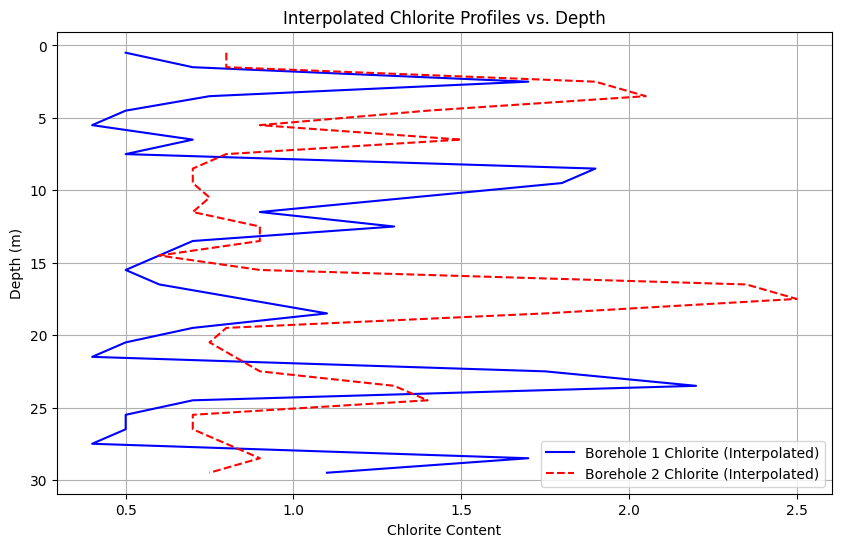

Optimal lag in samples: 59
Estimated fault offset: 5.90 meters



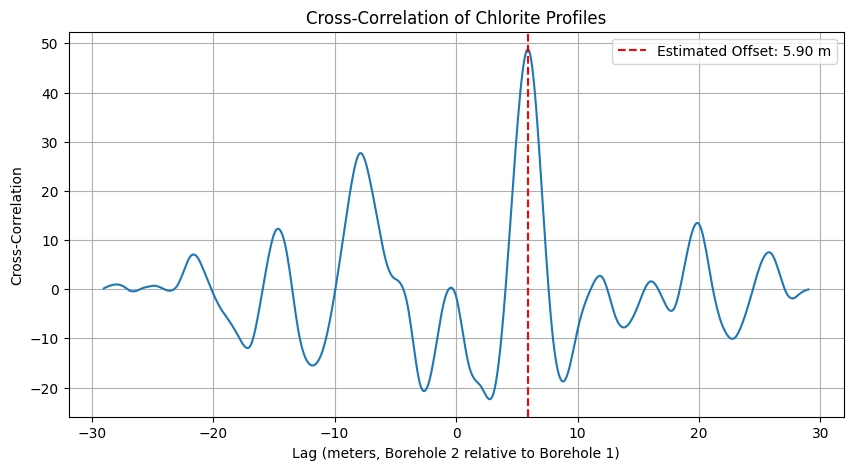

-- Discussion of Assumptions ---
Assumptions made for this cross-correlation analysis include:
1. Lateral Continuity: It is assumed that the chlorite content profiles are laterally continuous between the two boreholes, meaning the same geological features (variations in chlorite) exist in both, but are vertically displaced by the fault. This allows for direct comparison and correlation.
2. Consistent Sampling and Measurement: We assume that the chlorite content measurements are representative and consistently sampled within each borehole, and that the measurement technique itself is consistent and comparable between the two boreholes.
3. Monotonic Variation: For effective correlation, there should be sufficient, non-random variation in chlorite content along the depth. A very flat or erratic profile would yield poor correlation results.
4. Vertical Fault Displacement: The method inherently assumes that the fault displacement is primarily vertical, as cross-correlation primarily detects

In [51]:
# STEP 1 - Define a common depth axis and interpolate the chlorite profiles

# Determine the min and max depth across both boreholes
min_depth = min(df_borehole1['Depth'].min(), df_borehole2['Depth'].min())
max_depth = max(df_borehole1['Depth'].max(), df_borehole2['Depth'].max())

# Define a uniform depth interval for interpolation
# Assuming a resolution similar to the original data, or slightly finer
depth_interval = 0.1 # meters, adjust as needed for desired resolution
depth_axis = np.arange(min_depth, max_depth + depth_interval, depth_interval)

# Interpolate chlorite profiles onto the common depth axis
chlorite_profile_1 = np.interp(depth_axis, df_borehole1['Depth'], df_borehole1['Chlorite'])
chlorite_profile_2 = np.interp(depth_axis, df_borehole2['Depth'], df_borehole2['Chlorite'])

print(f"Interpolated Borehole 1 chlorite profile length: {len(chlorite_profile_1)}")
print(f"Interpolated Borehole 2 chlorite profile length: {len(chlorite_profile_2)}\n")

# Plot the interpolated profiles for visual inspection
plt.figure(figsize=(10, 6))
plt.plot(chlorite_profile_1, depth_axis, label='Borehole 1 Chlorite (Interpolated)', color='blue')
plt.plot(chlorite_profile_2, depth_axis, label='Borehole 2 Chlorite (Interpolated)', color='red', linestyle='--')
plt.xlabel('Chlorite Content')
plt.ylabel('Depth (m)')
plt.title('Interpolated Chlorite Profiles vs. Depth')
plt.gca().invert_yaxis() # Invert y-axis to represent depth correctly
plt.legend()
plt.grid(True)
plt.show()

# STEP 2 - Perform cross-correlation

# To perform cross-correlation effectively, it's often beneficial to remove the mean
# from each signal to focus on the variations.
profile1_centered = chlorite_profile_1 - np.mean(chlorite_profile_1)
profile2_centered = chlorite_profile_2 - np.mean(chlorite_profile_2)

correlation_output = correlate(profile1_centered, profile2_centered, mode='full')

# The lags array indicates the relative shift between the two signals
lags = np.arange(-len(profile2_centered) + 1, len(profile1_centered))

# Find the lag that maximizes the correlation
max_correlation_idx = np.argmax(correlation_output)
optimal_lag_in_samples = lags[max_correlation_idx]

# Convert optimal lag from samples to depth units (meters)
estimated_fault_offset = optimal_lag_in_samples * depth_interval

print(f"Optimal lag in samples: {optimal_lag_in_samples}")
print(f"Estimated fault offset: {estimated_fault_offset:.2f} meters\n")

# Plot the cross-correlation result
plt.figure(figsize=(10, 5))
plt.plot(lags * depth_interval, correlation_output)
plt.axvline(estimated_fault_offset, color='red', linestyle='--', label=f'Estimated Offset: {estimated_fault_offset:.2f} m')
plt.xlabel('Lag (meters, Borehole 2 relative to Borehole 1)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation of Chlorite Profiles')
plt.legend()
plt.grid(True)
plt.show()

# STEP 3 - Discussion of assumptions
print("-- Discussion of Assumptions ---")
print("Assumptions made for this cross-correlation analysis include:")
print("1. Lateral Continuity: It is assumed that the chlorite content profiles are laterally continuous between the two boreholes, meaning the same geological features (variations in chlorite) exist in both, but are vertically displaced by the fault. This allows for direct comparison and correlation.")
print("2. Consistent Sampling and Measurement: We assume that the chlorite content measurements are representative and consistently sampled within each borehole, and that the measurement technique itself is consistent and comparable between the two boreholes.")
print("3. Monotonic Variation: For effective correlation, there should be sufficient, non-random variation in chlorite content along the depth. A very flat or erratic profile would yield poor correlation results.")
print("4. Vertical Fault Displacement: The method inherently assumes that the fault displacement is primarily vertical, as cross-correlation primarily detects vertical shifts. Any significant horizontal displacement or complex fault geometry (e.g., oblique slip, listric faults) would make this simple 1D correlation less accurate.")
print("5. No Major Facies Changes: It's assumed that no major facies changes or geological heterogeneities occur between the boreholes that would alter the chlorite profile significantly, other than the faulting itself. If the rock types or depositional environments differ greatly, the profiles might not be correlatable.")
print(f"\nBased on the analysis, the estimated vertical fault offset is {estimated_fault_offset:.2f} meters. A positive offset means Borehole 2's profile is shifted downwards relative to Borehole 1's profile to align them, and a negative offset means Borehole 2's profile is shifted upwards.")


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


In [52]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.


In [57]:
import numpy as np
import matplotlib.pyplot as plt

# STEP 1 - Define the shoot counts and their spatial context
shoot_counts = np.array([3, 5, 11, 12, 8, 19, 22, 18, 11, 13])

# The problem states measurements are in 20m x 20m squares, implying this is the interval along the profile.
square_size = 20 # meters

# Number of squares (measurement points)
num_squares = len(shoot_counts)

# Assuming squares are laid out contiguously or at 20m intervals along a single dimension (profile).
# The distance for each point can be considered the center of each square from the start of the profile.
distances = np.arange(0, num_squares * square_size, square_size)

print(f"Shoot Counts: {shoot_counts}")
print(f"Square Size (interval along profile): {square_size} meters")
print(f"Number of Measurement Squares: {num_squares}")
print(f"Distances along profile for each measurement: {distances} meters")

Shoot Counts: [ 3  5 11 12  8 19 22 18 11 13]
Square Size (interval along profile): 20 meters
Number of Measurement Squares: 10
Distances along profile for each measurement: [  0  20  40  60  80 100 120 140 160 180] meters


Calculated Lags (h): [ 20.  40.  60.  80. 100.]
Calculated Semivariance γ(h): [14.22222222 32.125      35.64285714 35.25       62.        ]


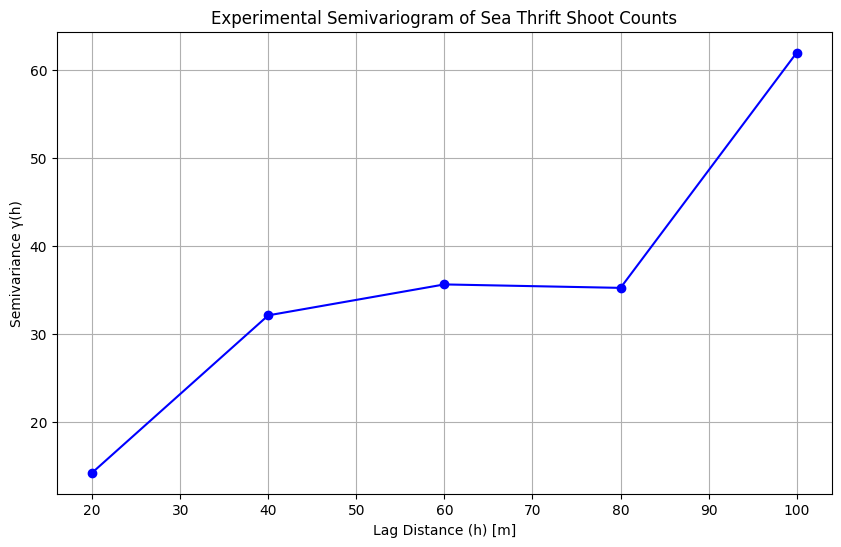


--- Discussion of Spatial Variability Implications ---
The experimental semivariogram plot visualizes the spatial dependency of the sea thrift shoot counts. Key patterns to look for are:
1.  **Nugget Effect**: If the semivariogram intercepts the y-axis above zero (at h=0), it indicates small-scale variability or measurement error. This suggests that even at very short distances, there's some inherent variability not captured by the spatial correlation.
2.  **Sill**: The plateau reached by the semivariogram. This value represents the total variance of the data and indicates the distance beyond which increasing separation no longer leads to increased dissimilarity. It signifies that observations beyond this distance are no longer spatially correlated.
3.  **Range**: The distance at which the semivariogram reaches the sill. This 'range of influence' is the maximum distance over which observations are spatially correlated. Beyond the range, samples are considered statistically independent

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve data from previous cell (Lhq-V_tipf5H)
# If running this cell independently, ensure shoot_counts, square_size, distances, and num_squares are defined.
# For notebook execution, these variables are typically available in the kernel.

# STEP 2 - Calculate the experimental semivariogram
# Define bins for distance h (lag)
# The maximum lag should ideally not exceed half of the maximum distance to ensure sufficient pairs for estimation.
max_lag_consideration = distances[-1] / 2

# Create lag bins that are multiples of the square_size
# Ensure lag_bins are positive and less than or equal to max_lag_consideration
lag_bins = np.arange(square_size, max_lag_consideration + square_size, square_size)

semivariance_values = []

for h in lag_bins:
    diffs_squared = []
    # Iterate through all possible pairs of points (i.e., measurement squares)
    for i in range(num_squares):
        for j in range(num_squares):
            # Calculate the absolute spatial distance between points i and j
            dist = np.abs(distances[i] - distances[j])

            # Check if the distance falls exactly into the current lag bin 'h'
            # Using `np.isclose` for robustness with floating point, though for integer multiples, `==` is fine.
            if np.isclose(dist, h):
                # Calculate the squared difference of the shoot counts for this pair
                diffs_squared.append((shoot_counts[i] - shoot_counts[j])**2)

    # Calculate the semivariance for the current lag 'h'
    # Semivariance γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ]
    if len(diffs_squared) > 0:
        semivariance = 0.5 * np.mean(diffs_squared)
        semivariance_values.append(semivariance)
    else:
        # If no pairs are found for this lag (shouldn't happen with proper lag_bins), add NaN
        semivariance_values.append(np.nan)

# Filter out any NaN values if for some reason a lag bin had no pairs
valid_lags = lag_bins[~np.isnan(semivariance_values)]
valid_semivariance = np.array(semivariance_values)[~np.isnan(semivariance_values)]

print(f"Calculated Lags (h): {valid_lags}")
print(f"Calculated Semivariance γ(h): {valid_semivariance}")

# STEP 3 - Plot the experimental semivariogram
plt.figure(figsize=(10, 6))
plt.plot(valid_lags, valid_semivariance, marker='o', linestyle='-', color='blue')
plt.xlabel('Lag Distance (h) [m]')
plt.ylabel('Semivariance γ(h)')
plt.title('Experimental Semivariogram of Sea Thrift Shoot Counts')
plt.grid(True)
plt.show()

# STEP 4 - Discussion of patterns and implications
print("\n--- Discussion of Spatial Variability Implications ---")
print("The experimental semivariogram plot visualizes the spatial dependency of the sea thrift shoot counts. Key patterns to look for are:")
print("1.  **Nugget Effect**: If the semivariogram intercepts the y-axis above zero (at h=0), it indicates small-scale variability or measurement error. This suggests that even at very short distances, there's some inherent variability not captured by the spatial correlation.")
print("2.  **Sill**: The plateau reached by the semivariogram. This value represents the total variance of the data and indicates the distance beyond which increasing separation no longer leads to increased dissimilarity. It signifies that observations beyond this distance are no longer spatially correlated.")
print("3.  **Range**: The distance at which the semivariogram reaches the sill. This 'range of influence' is the maximum distance over which observations are spatially correlated. Beyond the range, samples are considered statistically independent.")
print("\n**Implications for Copper Contamination Distribution:**")
print("If the semivariogram exhibits a clear structure (i.e., increasing semivariance with lag until a sill is reached), it implies that the copper contamination (and thus sea thrift presence) is not randomly distributed but follows a spatial pattern. For instance:")
print("-   A **small range** would suggest localized contamination, indicating that copper levels change significantly over short distances.")
print("-   A **large range** would imply a more widespread, diffuse contamination, where copper levels remain similar over longer distances.")
print("-   A **high nugget effect** could point to significant localized heterogeneity in copper levels, measurement noise, or very fine-scale variability not captured by the sampling interval.")
print("-   If the semivariogram is relatively **flat** (no clear increase with lag), it suggests that the copper contamination is randomly distributed or that any spatial correlation exists at scales smaller than the sampling interval, or larger than the maximum lag considered.")
print("By analyzing these features, we can infer the spatial continuity and distribution characteristics of the ancient copper contamination, which is crucial for environmental assessment and remediation planning.")

# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [ ]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

In [63]:
import pandas as pd
from google.colab import files
import io

# 2. Use files.upload() to prompt the user to upload a CSV file.
#    Store the uploaded file content (a dictionary) in a variable named `uploaded`.
uploaded = files.upload()

# 3. Get the filename of the uploaded file.
#    Assuming only one file is uploaded, you can get the first key from the `uploaded` dictionary.
filename = next(iter(uploaded))

# 4. Read the uploaded CSV file into a pandas DataFrame.
#    Use io.BytesIO to handle the in-memory uploaded file content.
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# 5. Print the first few rows of the DataFrame using df.head().
print(f"Successfully uploaded '{filename}' and loaded into a DataFrame.")
print(df.head(23))

Saving Problem 4.11 Table 5.xlsx to Problem 4.11 Table 5 (2).xlsx
Successfully uploaded 'Problem 4.11 Table 5 (2).xlsx' and loaded into a DataFrame.
    Depth Rock Type
0       1         U
1       2         S
2       3         K
3       4         S
4       5         S
5       6         K
6       7         K
7       8         C
8       9         U
9      10         S
10     11         K
11     12         S
12     13         S
13     14         K
14     15         C
15     16         U
16     17         S
17     18         S
18     19         S
19     20         K
20     21         K
21     22         K
22     23         U


In [65]:
rock_types = df['Rock Type'].unique()
print("Unique Rock Types (States of Markov Chain):", rock_types)

Unique Rock Types (States of Markov Chain): ['U' 'S' 'K' 'C']


In [67]:
rock_sequence = df['Rock Type'].tolist()

# Initialize a count matrix for transitions
# The order of rock_types in the 'rock_types' array (U, S, K, C) will define the order of rows/columns
# in the transition matrix.
num_states = len(rock_types)
transition_counts = np.zeros((num_states, num_states), dtype=int)

# Create a mapping from rock type to index
rock_type_to_index = {rock: i for i, rock in enumerate(rock_types)}

# Populate the transition counts
for i in range(len(rock_sequence) - 1):
    current_rock_idx = rock_type_to_index[rock_sequence[i]]
    next_rock_idx = rock_type_to_index[rock_sequence[i+1]]
    transition_counts[current_rock_idx, next_rock_idx] += 1

# Convert counts to probabilities (row-wise normalization)
transition_matrix = transition_counts.astype(float)
for i in range(num_states):
    row_sum = transition_matrix[i, :].sum()
    if row_sum > 0: # Avoid division by zero for states that never transition out
        transition_matrix[i, :] /= row_sum

print("--- Transition Matrix ---")
print("States: ", rock_types)
print(pd.DataFrame(transition_matrix, index=rock_types, columns=rock_types))


--- Transition Matrix ---
States:  ['U' 'S' 'K' 'C']
       U         S         K     C
U  0.000  1.000000  0.000000  0.00
S  0.000  0.444444  0.555556  0.00
K  0.125  0.250000  0.375000  0.25
C  1.000  0.000000  0.000000  0.00


In [69]:
rock_sequence = df['Rock Type'].tolist()

# 1. Determine the last drilled rock type
last_rock_type = rock_sequence[-1]
print(f"Last drilled rock type: {last_rock_type}")

# Get the index of the last rock type
last_rock_index = rock_type_to_index[last_rock_type]

# Get the index for 'K' (conglomerate)
k_index = rock_type_to_index['K']

# --- Part 1: Probability of K in the next meter ---
# This is directly from the transition matrix, from the last_rock_type row to the K column
prob_k_next_meter = transition_matrix[last_rock_index, k_index]
print(f"Probability of drilling Conglomerate (K) in the next meter: {prob_k_next_meter:.4f}")

# --- Part 2: Probability of K in the next-but-one meter ---
# Calculate the squared transition matrix (T^2)
transition_matrix_squared = np.dot(transition_matrix, transition_matrix)

# The probability of going from the last rock type to K in two steps is given by (T^2)[last_rock_index, k_index]
prob_k_next_but_one_meter = transition_matrix_squared[last_rock_index, k_index]
print(f"Probability of drilling Conglomerate (K) in the next-but-one meter: {prob_k_next_but_one_meter:.4f}")


Last drilled rock type: U
Probability of drilling Conglomerate (K) in the next meter: 0.0000
Probability of drilling Conglomerate (K) in the next-but-one meter: 0.5556


## Summary:

### Q&A
*   The probability of drilling Conglomerate (K) in the next meter is 0.0000.
*   The probability of drilling Conglomerate (K) in the next-but-one meter is 0.5556.

### Data Analysis Key Findings
*   The unique rock types identified in the dataset, serving as states for the Markov chain, are 'U', 'S', 'K', and 'C'.
*   A transition matrix was constructed to model the probabilities of transitioning between these rock types. For example, the probability of transitioning from 'U' to 'S' is 1.0, and from 'S' to 'K' is approximately 0.5556.
*   The last drilled rock type in the provided sequence is 'U'.
*   The calculated probability of encountering Conglomerate (K) in the next meter, given the last drilled rock type was 'U', is 0.0000.
*   The calculated probability of encountering Conglomerate (K) in the next-but-one meter, based on a two-step transition from 'U', is 0.5556.

### Insights or Next Steps
*   Based on the current drilling ending with 'U', there is no immediate likelihood of encountering Conglomerate (K) in the very next meter. However, there's a substantial chance (over 55%) of encountering it two meters ahead.
*   This predictive insight can be used for operational planning, such as preparing appropriate drilling equipment or adjusting strategies for potential rock type changes two meters in advance.


# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [70]:
import pandas as pd

# Raw data from the problem description
data_string = "123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21, 110/25, 101/25, 133/20, 123/22, 145/25, 126/24"

# Split the string by comma and then by '/' to get dip direction and dip
entries = data_string.split(', ')

dip_directions = []
dips = []

for entry in entries:
    direction, dip = map(int, entry.split('/'))
    dip_directions.append(direction)
    dips.append(dip)

# Create a Pandas DataFrame
df_orientation = pd.DataFrame({
    'Dip Direction (α)': dip_directions,
    'Dip (β)': dips
})

print("Orientation Data (Dip Direction / Dip \u03B2):")
print(df_orientation.to_string(index=False))

Orientation Data (Dip Direction / Dip β):
 Dip Direction (α)  Dip (β)
               123       25
               147       22
               120       24
               111       24
               142       26
               133       27
               135       22
               156       21
               110       25
               101       25
               133       20
               123       22
               145       25
               126       24


In [71]:
import numpy as np
import pandas as pd

# Ensure df_orientation is available from the previous cell
# If running this cell independently, uncomment and run the previous cell's code to define df_orientation
# data_string = "123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21, 110/25, 101/25, 133/20, 123/22, 145/25, 126/24"
# entries = data_string.split(', ')
# dip_directions = [int(entry.split('/')[0]) for entry in entries]
# dips = [int(entry.split('/')[1]) for entry in entries]
# df_orientation = pd.DataFrame({'Dip Direction (α)': dip_directions, 'Dip (β)': dips})

# Convert dip direction and dip to radians
df_orientation['Dip Direction (rad)'] = np.deg2rad(df_orientation['Dip Direction (α)'])
df_orientation['Dip (rad)'] = np.deg2rad(df_orientation['Dip (β)'])

# Calculate x, y, z coordinates
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)

df_orientation['x'] = np.cos(df_orientation['Dip (rad)']) * np.sin(df_orientation['Dip Direction (rad)'])
df_orientation['y'] = np.cos(df_orientation['Dip (rad)']) * np.cos(df_orientation['Dip Direction (rad)'])
df_orientation['z'] = np.sin(df_orientation['Dip (rad)'])

print("Orientation Data with Cartesian Coordinates:")
print(df_orientation.to_string(index=False))

Orientation Data with Cartesian Coordinates:
 Dip Direction (α)  Dip (β)  Dip Direction (rad)  Dip (rad)        x         y        z
               123       25             2.146755   0.436332 0.760094 -0.493611 0.422618
               147       22             2.565634   0.383972 0.504981 -0.777602 0.374607
               120       24             2.094395   0.418879 0.791154 -0.456773 0.406737
               111       24             1.937315   0.418879 0.852868 -0.327385 0.406737
               142       26             2.478368   0.453786 0.553353 -0.708259 0.438371
               133       27             2.321288   0.471239 0.651641 -0.607665 0.453990
               135       22             2.356194   0.383972 0.655618 -0.655618 0.374607
               156       21             2.722714   0.366519 0.379721 -0.852868 0.358368
               110       25             1.919862   0.436332 0.851651 -0.309976 0.422618
               101       25             1.762783   0.436332 0.889656 -0.172

In [ ]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.
#
# You might consider using spherical to Cartesian conversions:
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)
# (in radians)

# Task
Calculate the mean resultant length, the dip direction and dip of the mean vector, the spherical standard deviation, and the spherical confidence interval for the mean vector (using an error probability of alpha = 0.1) from the orientation data provided in the `df_orientation` DataFrame.

## Calculate Resultant Vector Components

### Subtask:
Sum the 'x', 'y', and 'z' components from the `df_orientation` DataFrame to get the resultant vector components (Rx, Ry, Rz).


**Reasoning**:
Calculate the sum of the 'x', 'y', and 'z' components from the `df_orientation` DataFrame to obtain the resultant vector components (Rx, Ry, Rz).



In [72]:
Rx = df_orientation['x'].sum()
Ry = df_orientation['y'].sum()
Rz = df_orientation['z'].sum()

print(f"Sum of x-components (Rx): {Rx:.4f}")
print(f"Sum of y-components (Ry): {Ry:.4f}")
print(f"Sum of z-components (Rz): {Rz:.4f}")

Sum of x-components (Rx): 9.6145
Sum of y-components (Ry): -7.7879
Sum of z-components (Rz): 5.6273


**Reasoning**:
Now that the resultant vector components (Rx, Ry, Rz) are calculated, the next step is to determine the mean resultant length by calculating the magnitude of the resultant vector R.



In [73]:
R = np.sqrt(Rx**2 + Ry**2 + Rz**2)
n = len(df_orientation) # Number of observations
mean_resultant_length = R / n

print(f"Resultant vector magnitude (R): {R:.4f}")
print(f"Number of observations (n): {n}")
print(f"Mean resultant length: {mean_resultant_length:.4f}")

Resultant vector magnitude (R): 13.5925
Number of observations (n): 14
Mean resultant length: 0.9709


**Reasoning**:
With the resultant vector components and its magnitude calculated, the next logical step is to determine the dip of the mean vector by converting the 'z' component of the resultant vector into an angle.



In [74]:
mean_dip_rad = np.arcsin(Rz / R)
mean_dip_deg = np.rad2deg(mean_dip_rad)

print(f"Mean Dip (radians): {mean_dip_rad:.4f}")
print(f"Mean Dip (degrees): {mean_dip_deg:.4f}")

Mean Dip (radians): 0.4268
Mean Dip (degrees): 24.4562


**Reasoning**:
Now that the mean resultant length and mean dip have been determined, the next step is to calculate the dip direction of the mean vector using the resultant x and y components.



In [75]:
mean_dip_direction_rad = np.arctan2(Rx, Ry)
mean_dip_direction_deg = np.rad2deg(mean_dip_direction_rad)

# Adjust to 0-360 range if necessary
if mean_dip_direction_deg < 0:
    mean_dip_direction_deg += 360

print(f"Mean Dip Direction (radians): {mean_dip_direction_rad:.4f}")
print(f"Mean Dip Direction (degrees): {mean_dip_direction_deg:.4f}")

Mean Dip Direction (radians): 2.2516
Mean Dip Direction (degrees): 129.0081


**Reasoning**:
Now that the mean resultant length is calculated, the next step is to determine the spherical standard deviation using the mean resultant length.



In [76]:
spherical_std_dev = np.rad2deg(np.arccos(mean_resultant_length))

print(f"Spherical Standard Deviation: {spherical_std_dev:.4f} degrees")

Spherical Standard Deviation: 13.8579 degrees


**Reasoning**:
To determine the spherical confidence interval, I will use the formula for the semi-vertical angle of the cone of confidence, which involves the number of observations, the resultant vector magnitude, and the error probability.



In [77]:
alpha = 0.1 # Error probability

# Formula for the semi-vertical angle of the cone of confidence (Fisher statistics)
# This formula applies when the data are assumed to follow a Fisher distribution.
# cos(angle) = 1 - ((N - R) / R) * ((1/alpha)^(1/(N-1)) - 1)

factor1 = (n - R) / R
factor2 = (1 / alpha)**(1 / (n - 1)) - 1

cos_confidence_angle = 1 - (factor1 * factor2)

spherical_confidence_interval_angle_rad = np.arccos(cos_confidence_angle)
spherical_confidence_interval_angle_deg = np.rad2deg(spherical_confidence_interval_angle_rad)

print(f"Spherical Confidence Interval (alpha={alpha}):")
print(f"Half-angle of the cone of confidence: {spherical_confidence_interval_angle_deg:.4f} degrees")

Spherical Confidence Interval (alpha=0.1):
Half-angle of the cone of confidence: 6.1789 degrees


## Present Results

### Subtask:
Present all calculated statistics in a clear and understandable format.


## Summary:

### Data Analysis Key Findings

*   The resultant vector components were calculated as: Rx = 9.6145, Ry = -7.7879, and Rz = 5.6273.
*   The mean resultant length was found to be 0.9709, based on a resultant vector magnitude (R) of 13.5925 from 14 observations.
*   The mean dip of the orientation data is 24.4562 degrees.
*   The mean dip direction was determined to be 129.0081 degrees.
*   The spherical standard deviation of the orientation data is 13.8579 degrees.
*   The spherical confidence interval (half-angle of the cone of confidence) for the mean vector, with an error probability (alpha) of 0.1, is 6.1789 degrees.

### Insights or Next Steps
*   The high mean resultant length (0.9709) and relatively small spherical standard deviation (13.8579 degrees) suggest a strong clustering of the orientation data around the calculated mean vector.
*   Further analysis could involve plotting these statistics on a stereonet to visually confirm the clustering and the cone of confidence, or comparing these results with other geological features in the study area.


In [78]:
# Signature Cell

print("Please enter your first name, last name, and netID below:")

first_name = input("First Name: ")
last_name = input("Last Name: ")
netID = input("NetID: ")

print(f"Thank you, {first_name} {last_name}. Your netID, {netID}, has been recorded.")

Please enter your first name, last name, and netID below:
First Name: Alex
Last Name: Gould
NetID: amgould2
Thank you, Alex Gould. Your netID, amgould2, has been recorded.
